# Introductie

Kaggle is een platform voor analytische competities met machine learning problemen. Het helpt bedrijven en organisaties om de beste modellen te verkrijgen voor het voorspellen en beschrijven van hun datasets. Tegenwoordig worden er veel producten online verkocht. Kleding heeft sterke seizoensprijzen en wordt sterk beïnvloed door merknamen, terwijl de prijs van elektronica beïnvloed wordt door productspecificaties.  De Kaggle opdracht ‘Mercari Price Suggestion Challenge’ wordt georganiseerd door Mercari, de grootste winkel software applicatie van Japan. Mercari biedt een manier voor iedereen om producten via hun mobiele apparaat te kopen en verkopen. Mercari wilt een nauwkeurige prijs suggestie bieden aan de verkopers. In deze competitie wordt er gevraagd om een algoritme te schrijven die automatisch de juiste productprijzen voorstelt gebaseerd op de productnaam, categorie, merknaam en ingevoerde tekstbeschrijvingen.

# Data visualisatie

## Data overzicht

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Get train and test dataset
train = pd.read_csv("train.tsv", sep = "\t")
test = pd.read_csv("test.tsv", sep = "\t")

In [2]:
# Information about the train dataset
train.info()
train.describe()

# Example of first 5 entries in the train dataset
train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [3]:
# Information about the test dataset
test.info()
test.describe()

# Example of first 5 entries in the test dataset
test.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (total 7 columns):
test_id              693359 non-null int64
name                 693359 non-null object
item_condition_id    693359 non-null int64
category_name        690301 non-null object
brand_name           397834 non-null object
shipping             693359 non-null int64
item_description     693359 non-null object
dtypes: int64(3), object(4)
memory usage: 37.0+ MB


,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


De training set bevat 1482535 observaties en de test set bevat 693359 observaties.
De training set heeft zes variabelen net als de test dataset, als je train_id, test_id en price buiten beschouwing laat. De variabelen hebben verschillende types zoals, continuous, binary en categorical.
In de bovenstaande tabellen is te zien hoe de datasets er uit zien.

## Product naam

In [4]:
# Get number of unique product names
print (train.name.value_counts().size)

1225273


Van de 1482535 observaties in de trainingset hebben 1225273 producten verschillende namen. Dit betekent dat de productnamen niet uniek zijn en dat er van een bepaald product meerder exemplaren aangeboden worden.

## Staat van het product

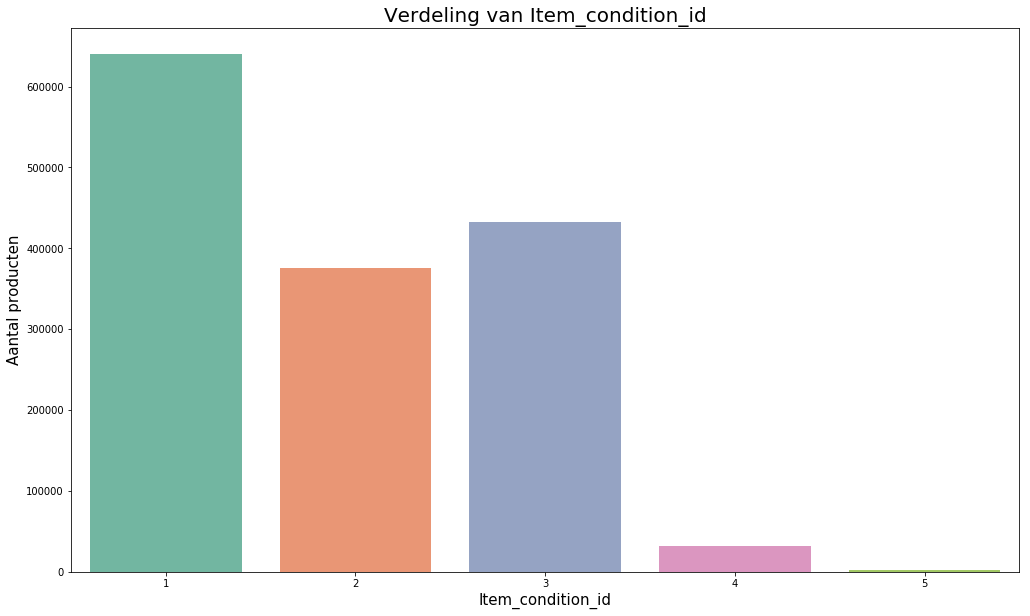

In [5]:
# Plot distribution of conditions
total = float(len(train.item_condition_id))

plt.figure(figsize=(17,10))
ax = sns.countplot(train.item_condition_id, palette="Set2")

plt.title('Verdeling van Item_condition_id', fontsize = 20)
plt.ylabel('Aantal producten', fontsize = 15)
plt.xlabel('Item_condition_id', fontsize = 15)
plt.show()

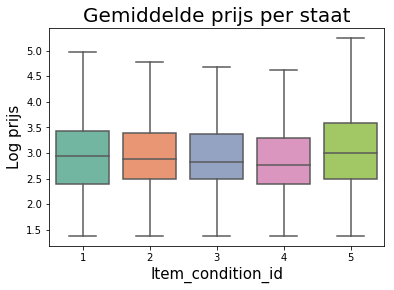

In [6]:
sns.boxplot(x=train.item_condition_id, y = np.log(train.price+1),showfliers=False, orient = 'v', palette="Set2")
plt.title('Gemiddelde prijs per staat', fontsize = 20)
plt.xlabel('Item_condition_id', fontsize = 15)
plt.ylabel('Log prijs', fontsize = 15)
plt.show()

De variabel item_condition_id heeft een waarde van 1 tot 5. Waarde 1 betekent dat het product nieuw is en waarde 5 betekent dat het producht slecht is. De meeste producten hebben een waarde van 1. Producten met een waarde van 4 en 5 zijn er relatief weinig. Als de waarde van item_condition_id laag is, zou deze een positieve correlatie met de prijs moeten hebben. Kijkend naar de grafiek klopt deze hypothese met uitzondering op waarde 5. Producten met waarde 5 hebben de hoogste prijs en producten met de waarde 1 hebben de volgende hoogste prijs. Voorwaarde 5 is een anomalie, omdat het de hoogste prijs heeft, maar ook het minst aantal producten. De schatting is dus het meest onzeker.

## Verzending

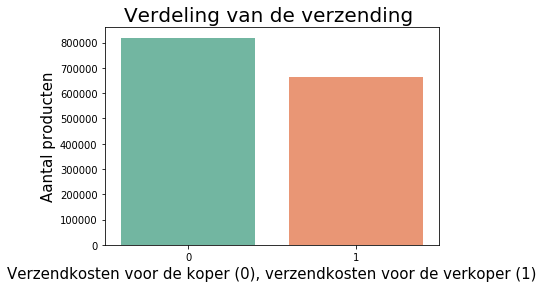

In [7]:
sns.countplot(x=train.shipping,palette="Set2")
plt.title('Verdeling van de verzending ', fontsize = 20)
plt.xlabel('Verzendkosten voor de koper (0), verzendkosten voor de verkoper (1)', fontsize = 15)
plt.ylabel('Aantal producten', fontsize = 15)
plt.show()

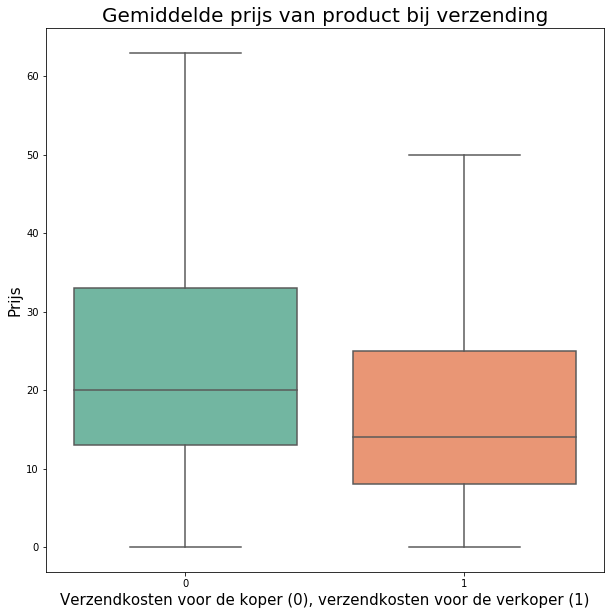

In [8]:
plt.figure(figsize=(10,10))
sns.boxplot(x=train.shipping, y = train.price, showfliers=False, orient = 'v',palette="Set2")
plt.title('Gemiddelde prijs van product bij verzending', fontsize = 20)
plt.xlabel('Verzendkosten voor de koper (0), verzendkosten voor de verkoper (1)', fontsize = 15)
plt.ylabel('Prijs', fontsize = 15)
plt.show()

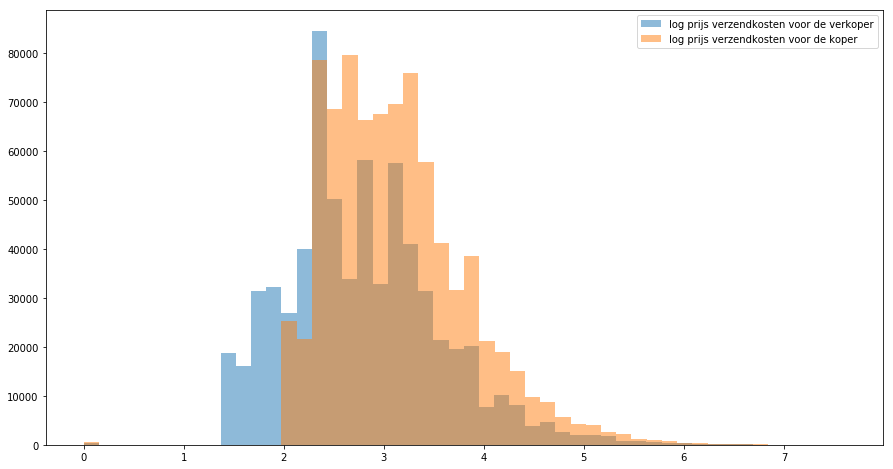

In [9]:
plt.figure(figsize = (15, 8))
plt.hist(np.log(train[train.shipping == 1].price+1), 
         bins = 50, alpha = 0.5, label = "log prijs verzendkosten voor de verkoper")
plt.hist(np.log(train[train.shipping == 0].price+1), 
         bins = 50, alpha = 0.5, label = "log prijs verzendkosten voor de koper")
plt.legend(fontsize = 10)
plt.show()

-- meeste door de koper zelf
-- producten waar de verzendkosten betaald worden door de verkoper hebben een lager gemiddelde prijs. 

## Merknaam

In [10]:
train.brand_name.isnull().sum()

632682

In [11]:
brands = train.brand_name.value_counts()
print(brands.size)

4809


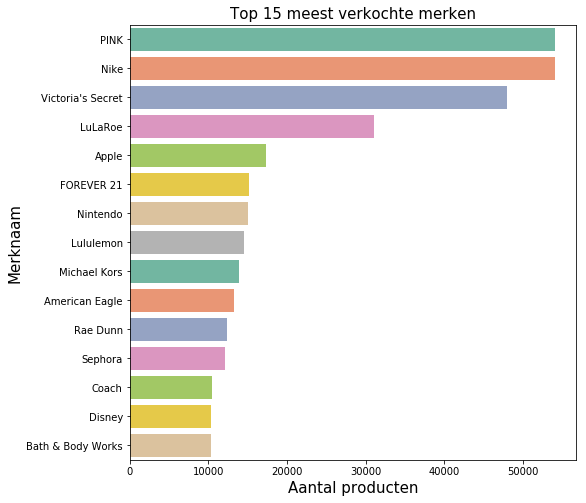

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(y = train.brand_name, \
              order = train.brand_name.value_counts().iloc[:15].index, \
                                                      orient = 'v', palette="Set2")
plt.title('Top 15 meest verkochte merken', fontsize = 15)
plt.ylabel('Merknaam', fontsize = 15)
plt.xlabel('Aantal producten', fontsize = 15)
plt.show()

In [ ]:
# nog mee aan het kloten
plt.figure(figsize=(10,10))
sns.boxplot(x=train.brand_name[:10], y = train.price, showfliers=False, orient = 'v',palette="Set2")
plt.title('Gemiddelde prijs van product bij verzending', fontsize = 20)
plt.xlabel('Verzendkosten voor de koper (0), verzendkosten voor de verkoper (1)', fontsize = 15)
plt.ylabel('Prijs', fontsize = 15)
plt.show()

brand_mean_price = train.groupby(["brand_name"], as_index = True).mean().price.sort_values(ascending = False)
print("mean price by brands", brand_mean_price[:10])
brand_median_price = train.groupby(["brand_name"]).median().price.sort_values(ascending = False)
print("median price by brands", brand_median_price[:10])

4809 merken exclusief unknown
hoeveel unknown, hoe komt dit?
hoeveel missing values?
Top 25 merknamen, meest verkocht

## Product categorieën